In [1]:
from covid19dh import covid19
import covsirphy as cs
import numpy as np

# SKIP THE DATA DOWNLOAD PART
this is done only for manually passing the dataset as dataset

## Data download

In [81]:
x, src = covid19("Italy", level = 2)
v_cols = ['deaths', 'confirmed', 'recovered', 'deaths']
x[v_cols] = x[v_cols].fillna(0).astype(np.int64)

#creating csv files
src.to_csv("input/italy_src.csv")
x.to_csv("input/italy.csv")

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In order to prepare the dataset we follow the instructions provided here

https://lisphilar.github.io/covid19-sir/INSTALLATION.html#dataset-preparation


We can replace jhu_data instance created by DataLoader class with your dataset saved in a CSV file. As an example, we have a CSV file (“oslo.csv”) with the following columns.

+ “date”: reported dates
+ “confirmed”: the number of confirmed cases
+ “recovered”: the number of recovered cases
+ “fatal”: the number of fatal cases
+ “province”: province names

Please create CountryData instance at first.

In [82]:
x.columns

Index(['id', 'date', 'vaccines', 'tests', 'confirmed', 'recovered', 'deaths',
       'hosp', 'vent', 'icu', 'population', 'school_closing',
       'workplace_closing', 'cancel_events', 'gatherings_restrictions',
       'transport_closing', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns', 'testing_policy', 'contact_tracing',
       'stringency_index', 'iso_alpha_3', 'iso_alpha_2', 'iso_numeric',
       'currency', 'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'key', 'key_google_mobility',
       'key_apple_mobility', 'key_numeric', 'key_alpha_2'],
      dtype='object')

In [88]:
# Create CountryData instance
country_data = cs.CountryData("input/italy.csv", country="italy")
country_data.set_variables(
    date="date",
    confirmed="confirmed",
    recovered="recovered",
    fatal="deaths",
    province="administrative_area_level_2"
)
# If you do not have province column, you can specify with province argument
# country_data = cs.CountryData("oslo.csv", country="Norway", province="Oslo")
# country_data.set_variables(
#     date="date", confirmed="confirmed", recovered="recovered", fatal="fatal",
# )
# If the dataset does not have province-level records,
# country_data = cs.CountryData("input/italy.csv", country="Norway")
# country_data.set_variables(
#     date="date", confirmed="confirmed", recovered="recovered", fatal="deaths",
# )

If **WORK ON NATIONAL DATA**

In [107]:
# Create JHUData instance using cleaned dataset (pandas.DataFrame)
# jhu_data = cs.JHUData.from_dataframe(country_data.cleaned())

jhu_data = cs.JHUData.from_dataframe(country_data.cleaned())
jhu_data.countries()
# jhu_data = data_loader.jhu()

# Or, we can use and update the output of DataLoader.jhu()
# jhu_data = data_loader.jhu()
# jhu_data.replace(country_data)

['Italy']

In [108]:
country_data = cs.CountryData("input/italy.csv", country="Italy")
country_data.set_variables(
    date="date",
    confirmed="confirmed",
    recovered="recovered",
    fatal="deaths",
    # province="administrative_area_level_2"
)

jhu_data = cs.JHUData.from_dataframe(country_data.cleaned())
jhu_data.countries()

['Italy']

If **WORK ON PROVINCE/REGIONAL DATA**

In [113]:
country_data2 = cs.CountryData("input/italy.csv", country="Italy")
country_data2.set_variables(
    date="date",
    confirmed="confirmed",
    recovered="recovered",
    fatal="deaths",
    province="administrative_area_level_2"
)

jhu_data2 = cs.JHUData.from_dataframe(country_data2.cleaned())
jhu_data2.countries()

#how to access and create a scenario
snl = cs.Scenario(jhu_data2, population_data, country = 'Italy', province = "Veneto")
jhu_data2.records(country = "Italy", province = "Veneto")

(          Date  Confirmed  Infected  Fatal  Recovered
 0   2020-03-03        307       297      3          7
 1   2020-03-04        360       345      6          9
 2   2020-03-05        407       380     10         17
 3   2020-03-06        488       454     12         22
 4   2020-03-07        543       505     13         25
 ..         ...        ...       ...    ...        ...
 318 2021-01-15     294874     75353   7859     211662
 319 2021-01-16     296803     72371   7932     216500
 320 2021-01-17     298172     70640   7978     219554
 321 2021-01-18     299170     69083   8025     222062
 322 2021-01-19     300127     63171   8187     228769
 
 [323 rows x 5 columns],
 'monotonic increasing complemented fatal data and \nmonotonic increasing complemented recovered data')

Add manually the population

In [143]:
dict_population = {}

for single_province in x.administrative_area_level_2.unique():
    dict_population.setdefault(single_province, x[x.loc[:,'administrative_area_level_2'] == single_province].loc[:,'population'].values[0])

print(dict_population)

{'Friuli Venezia Giulia': 1215538.0, 'P.A. Bolzano': 527750.0, 'Molise': 308493.0, 'Campania': 5826860.0, 'Veneto': 4905037.0, 'Basilicata': 567118.0, 'Lazio': 5896693.0, 'Lombardia': 10036258.0, 'P.A. Trento': 539898.0, 'Piemonte': 4375865.0, "Valle d'Aosta": 126202.0, 'Sicilia': 5026989.0, 'Marche': 1531753.0, 'Calabria': 1956687.0, 'Liguria': 1556981.0, 'Umbria': 884640.0, 'Emilia-Romagna': 4452629.0, 'Abruzzo': 1315196.0, 'Puglia': 4048242.0, 'Toscana': 3736968.0, 'Sardegna': 1648176.0}


In [144]:
# Additionally, you may need to register population values to PopulationData instance manually.
# Create PopulationData instance with empty dataset
population_data = cs.PopulationData()
# Or, we can use the output of DataLoader.population()
population_data = data_loader.population()
# Update the population value
for single_prov in dict_population.keys():
    population_data.update(int(dict_population.get(single_prov)), country="Italy", province=single_prov)

# FROM NOW ON
+ Download the "official data" from https://covid19datahub.io/
+ See how it looks like
+ Use country : Italy -> province : Veneto as **data** for the scenarios

### Prepare the instances

In [116]:
cs.__version__
# Create DataLoader instance
data_loader = cs.DataLoader("input")

#Download all datasets from all countries and clean it
jhu_data = data_loader.jhu()
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
15122,2021-01-15,Japan,-,309214,66432,4315,238467
15123,2021-01-16,Japan,-,315910,67557,4380,243973
15124,2021-01-17,Japan,-,322296,69362,4446,248488
15125,2021-01-18,Japan,-,328294,71006,4501,252787
15126,2021-01-19,Japan,-,334328,72061,4548,257719


### Other datasets that can be useful

In [3]:
# (Main) Population in each country
population_data = data_loader.population()
# (Main) Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()
# # Linelist of case reports
# linelist = data_loader.linelist()
# The number of tests
pcr_data = data_loader.pcr()
# The number of vaccinations
vaccine_data = data_loader.vaccine()
# Population pyramid
pyramid_data = data_loader.pyramid()

In [117]:
jhu_data.cleaned().head()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
0,2020-01-01,Afghanistan,-,0,0,0,0
1,2020-01-02,Afghanistan,-,0,0,0,0
2,2020-01-03,Afghanistan,-,0,0,0,0
3,2020-01-04,Afghanistan,-,0,0,0,0
4,2020-01-05,Afghanistan,-,0,0,0,0


In [118]:
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
15122,2021-01-15,Japan,-,309214,66432,4315,238467
15123,2021-01-16,Japan,-,315910,67557,4380,243973
15124,2021-01-17,Japan,-,322296,69362,4446,248488
15125,2021-01-18,Japan,-,328294,71006,4501,252787
15126,2021-01-19,Japan,-,334328,72061,4548,257719


In [121]:
jhu_data.cleaned().Country.unique()

['Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', ..., 'South Africa', 'Zambia', 'Zimbabwe', 'China', 'Japan']
Length: 199
Categories (199, object): ['Afghanistan', 'Angola', 'Albania', 'Andorra', ..., 'Zambia', 'Zimbabwe', 'China', 'Japan']

### How to subset the data

In [122]:
jhu_data.records(country = "Italy", province = 'Veneto')

(          Date  Confirmed  Infected  Fatal  Recovered
 0   2020-03-03        307       297      3          7
 1   2020-03-04        360       345      6          9
 2   2020-03-05        407       380     10         17
 3   2020-03-06        488       454     12         22
 4   2020-03-07        543       505     13         25
 ..         ...        ...       ...    ...        ...
 319 2021-01-16     296803     72371   7932     216500
 320 2021-01-17     298172     70640   7978     219554
 321 2021-01-18     299170     69083   8025     222062
 322 2021-01-19     300127     63171   8187     228769
 323 2021-01-20     300127     63171   8187     228769
 
 [324 rows x 5 columns],
 'monotonic increasing complemented fatal data and \nmonotonic increasing complemented recovered data')

Let’s see the records at first. Scenario.records() method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

In [8]:
snl = cs.Scenario(jhu_data, population_data, country="Italy", province='Veneto')

The following code is done using the instructions contained here:

https://lisphilar.github.io/covid19-sir/usage_quick.html

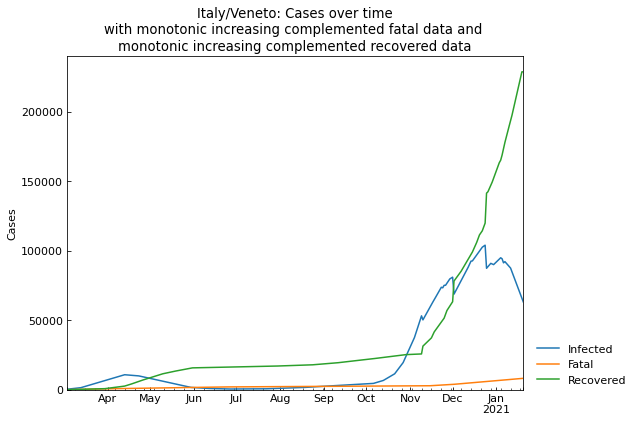

In [9]:
record_df = snl.records()
record_df.tail()

We can calculate the number of daily new cases with Scenario.record_diff() method.



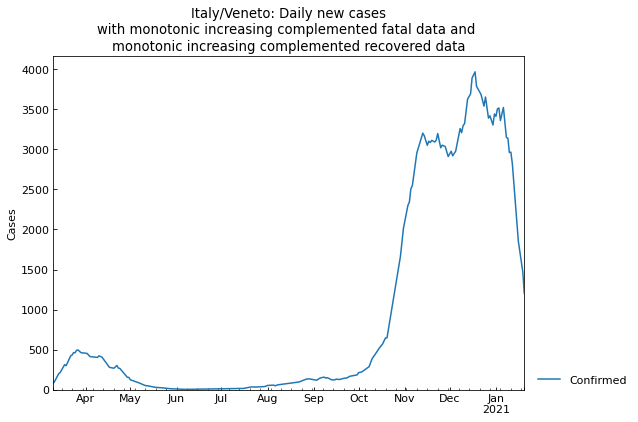

In [16]:
confirmed_df = snl.records_diff(variables=["Confirmed"], window=7)

In [17]:
#returns the dataframe for a given variable
confirmed_df

,Confirmed
Date,
2020-03-10,78
2020-03-11,94
2020-03-12,139
2020-03-13,158
2020-03-14,199
...,...
2021-01-16,1854
2021-01-17,1740
2021-01-18,1638


## S-R trend analysis
finds the change points of SIR-derived ODE parameters

**to manually set phases**
https://lisphilar.github.io/covid19-sir/usage_phases.html

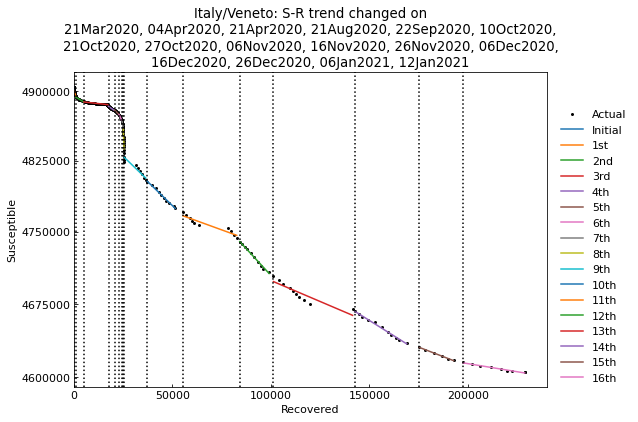

,Type,Start,End,Population
0th,Past,03Mar2020,20Mar2020,4905037
1st,Past,21Mar2020,03Apr2020,4905037
2nd,Past,04Apr2020,20Apr2020,4905037
3rd,Past,21Apr2020,20Aug2020,4905037
4th,Past,21Aug2020,21Sep2020,4905037
5th,Past,22Sep2020,09Oct2020,4905037
6th,Past,10Oct2020,20Oct2020,4905037
7th,Past,21Oct2020,26Oct2020,4905037
8th,Past,27Oct2020,05Nov2020,4905037
9th,Past,06Nov2020,15Nov2020,4905037


In [30]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models

Explanation for the models: https://lisphilar.github.io/covid19-sir/usage_theoretical.html

In [31]:
# Estimate the parameter values of SIR model
snl.estimate(cs.SIR)


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 3rd phase (12Jan2021 - 20Jan2021): finished  155 trials in 0 min 10 sec
	16th phase (16Nov2020 - 25Nov2020): finished  142 trials in 0 min 10 sec
	10th phase (06Nov2020 - 15Nov2020): finished 1687 trials in 3 min  1 sec
	15th phase (21Apr2020 - 20Aug2020): finished 1657 trials in 3 min  1 sec
	 2nd phase (27Oct2020 - 05Nov2020): finished 1666 trials in 3 min  1 sec
	14th phase (06Jan2021 - 11Jan2021): finished  118 trials in 0 min 10 sec
	 0th phase (10Oct2020 - 20Oct2020): finished  121 trials in 0 min 10 sec
	 1st phase (21Oct2020 - 26Oct2020): finished 1646 trials in 3 min  1 sec
	11th phase (04Apr2020 - 20Apr2020): finished 1656 trials in 3 min  1 sec
	13th phase (21Mar2020 - 03Apr2020): finished 1650 trials in 3 min  1 sec
	 6th phase (03Mar2020 - 20Mar2020): finished 1623 trials in 3 min  1 sec
	 7th phase (26Nov2020 - 05Dec2020): finished 1622 trials in 3 min  1 sec
	 4th phase (06Dec2020 - 15Dec2020): fini

In [32]:
# Show the summary of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,03Mar2020,20Mar2020,4905037,SIR,10.94,0.167118,0.015274,1440,5,65,0.074389,1623,3 min 1 sec
1st,Past,21Mar2020,03Apr2020,4905037,SIR,5.19,0.078315,0.015083,1440,12,66,0.031760,1650,3 min 1 sec
2nd,Past,04Apr2020,20Apr2020,4905037,SIR,1.66,0.035672,0.021466,1440,28,46,0.062102,1656,3 min 1 sec
3rd,Past,21Apr2020,20Aug2020,4905037,SIR,0.32,0.013473,0.042771,1440,74,23,0.457703,1657,3 min 1 sec
4th,Past,21Aug2020,21Sep2020,4905037,SIR,1.57,0.056921,0.036335,1440,17,27,0.040809,2406,3 min 1 sec
5th,Past,22Sep2020,09Oct2020,4905037,SIR,1.85,0.059697,0.032301,1440,16,30,0.019326,2435,3 min 1 sec
6th,Past,10Oct2020,20Oct2020,4905037,SIR,4.01,0.075921,0.018925,1440,13,52,0.012092,121,0 min 10 sec
7th,Past,21Oct2020,26Oct2020,4905037,SIR,11.84,0.106375,0.008984,1440,9,111,0.008892,1646,3 min 1 sec
8th,Past,27Oct2020,05Nov2020,4905037,SIR,36.50,0.089395,0.002449,1440,11,408,0.019417,1666,3 min 1 sec
9th,Past,06Nov2020,15Nov2020,4905037,SIR,3.10,0.059770,0.019293,1440,16,51,0.040040,1687,3 min 1 sec


### Accuracy of estimation


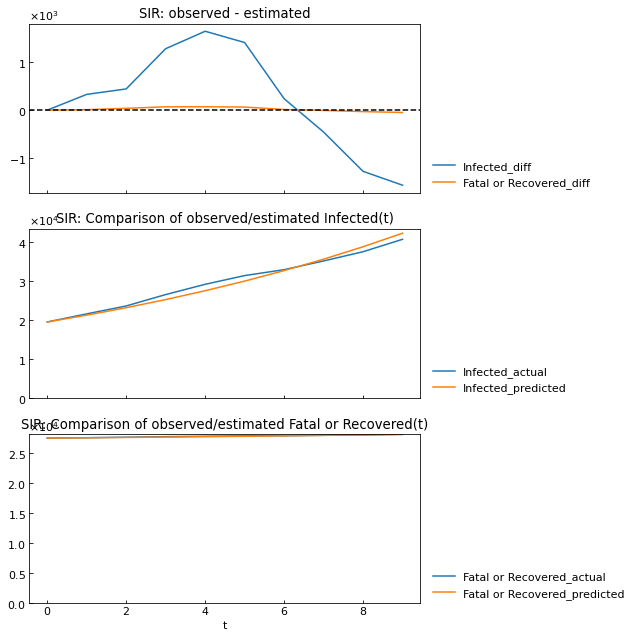

In [33]:
snl.estimate_accuracy(phase="8th")

### Get parameter value

In [34]:
#We can get the parameter values of a phase using Scenario.get() method.
snl.get("Rt", phase="8th")

36.5

### Show parameter history

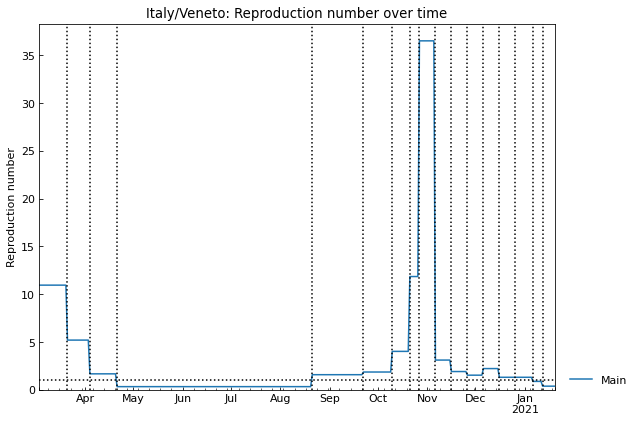

In [35]:
# Scenario.history() method shows the trajectories of parameters (and the number of cases).
_ = snl.history(target="Rt")

### Remove un-necessary change points manually

(the following text is an example, it actually comes from another dataset!!)
The slope of 4th phase seems to equal to that of 3rd phase. Here, we will combine 3rd phase and 4th phase here and reset phase names.

In [36]:
snl.combine(phases=["3rd", "4th"])
snl.summary()

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,03Mar2020,20Mar2020,4905037,SIR,10.94,0.167118,0.015274,1440.0,5.0,65.0,0.074389,1623.0,3 min 1 sec
1st,Past,21Mar2020,03Apr2020,4905037,SIR,5.19,0.078315,0.015083,1440.0,12.0,66.0,0.031760,1650.0,3 min 1 sec
2nd,Past,04Apr2020,20Apr2020,4905037,SIR,1.66,0.035672,0.021466,1440.0,28.0,46.0,0.062102,1656.0,3 min 1 sec
3rd,Past,21Apr2020,21Sep2020,4905037,-,-,-,-,-,-,-,-,-,-
4th,Past,22Sep2020,09Oct2020,4905037,SIR,1.85,0.059697,0.032301,1440.0,16.0,30.0,0.019326,2435.0,3 min 1 sec
5th,Past,10Oct2020,20Oct2020,4905037,SIR,4.01,0.075921,0.018925,1440.0,13.0,52.0,0.012092,121.0,0 min 10 sec
6th,Past,21Oct2020,26Oct2020,4905037,SIR,11.84,0.106375,0.008984,1440.0,9.0,111.0,0.008892,1646.0,3 min 1 sec
7th,Past,27Oct2020,05Nov2020,4905037,SIR,36.50,0.089395,0.002449,1440.0,11.0,408.0,0.019417,1666.0,3 min 1 sec
8th,Past,06Nov2020,15Nov2020,4905037,SIR,3.10,0.059770,0.019293,1440.0,16.0,51.0,0.040040,1687.0,3 min 1 sec
9th,Past,16Nov2020,25Nov2020,4905037,SIR,1.90,0.047571,0.025078,1440.0,21.0,39.0,0.012121,142.0,0 min 10 sec


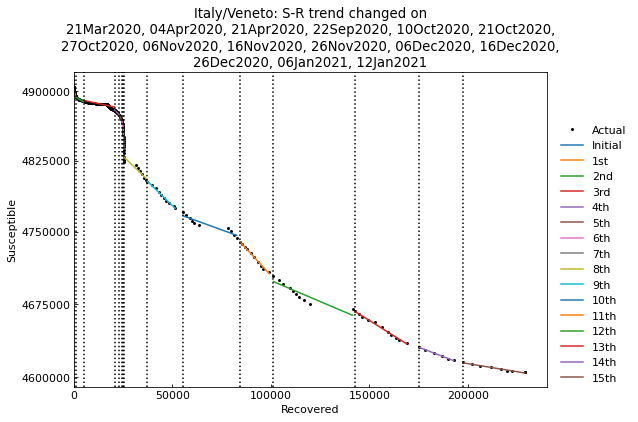

In [37]:
# Show the trend with manually set change points.
snl.trend(force=False)

### Separate phases manually
Because point of (x,y)=(S,R) jumped on 29May2020, we will separate the phase with this change point and reset phase names.


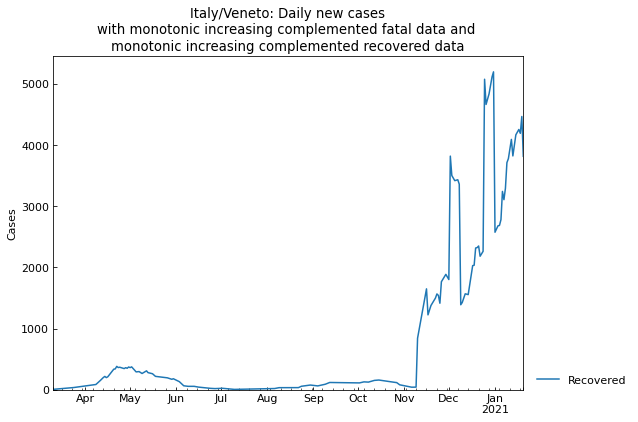

,Recovered
Date,
2020-03-10,5
2020-03-11,6
2020-03-12,5
2020-03-13,11
2020-03-14,11
...,...
2021-01-16,4211
2021-01-17,4252
2021-01-18,4189


In [44]:
confirmed_df = snl.records_diff(variables=["Recovered"], window=7)
confirmed_df

In [46]:
# Before: 1st is 20May2020-02Jun2020
# After: 1st is 20May2020-28May2020, 2nd is 29May2020-02Jun2020
snl.separate(date="01Dec2020", phase="1st")
snl.summary()


,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,03Mar2020,20Mar2020,4905037,SIR,10.94,0.167118,0.015274,1440.0,5.0,65.0,0.074389,1623.0,3 min 1 sec
1st,Past,21Mar2020,03Apr2020,4905037,SIR,5.19,0.078315,0.015083,1440.0,12.0,66.0,0.031760,1650.0,3 min 1 sec
2nd,Past,04Apr2020,20Apr2020,4905037,SIR,1.66,0.035672,0.021466,1440.0,28.0,46.0,0.062102,1656.0,3 min 1 sec
3rd,Past,21Apr2020,28May2020,4905037,-,-,-,-,-,-,-,-,-,-
4th,Past,29May2020,21Sep2020,4905037,-,-,-,-,-,-,-,-,-,-
5th,Past,22Sep2020,09Oct2020,4905037,SIR,1.85,0.059697,0.032301,1440.0,16.0,30.0,0.019326,2435.0,3 min 1 sec
6th,Past,10Oct2020,20Oct2020,4905037,SIR,4.01,0.075921,0.018925,1440.0,13.0,52.0,0.012092,121.0,0 min 10 sec
7th,Past,21Oct2020,26Oct2020,4905037,SIR,11.84,0.106375,0.008984,1440.0,9.0,111.0,0.008892,1646.0,3 min 1 sec
8th,Past,27Oct2020,05Nov2020,4905037,SIR,36.50,0.089395,0.002449,1440.0,11.0,408.0,0.019417,1666.0,3 min 1 sec
9th,Past,06Nov2020,15Nov2020,4905037,SIR,3.10,0.059770,0.019293,1440.0,16.0,51.0,0.040040,1687.0,3 min 1 sec


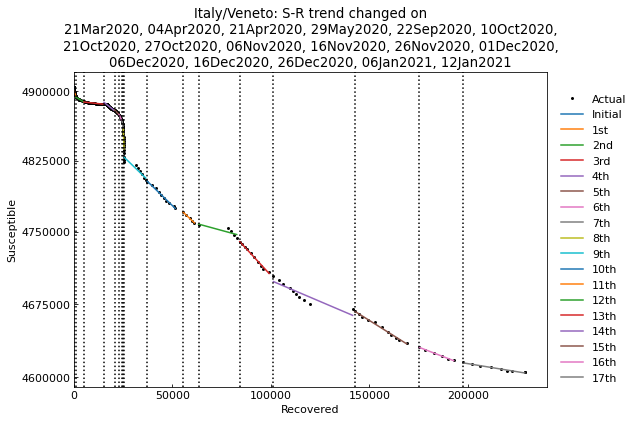

In [47]:
# Show the trend with manually set change points.
snl.trend(force=False)

### Disable/enable phases manually
Phases can be disable for parameter eatimation. Disabled phases can be enabled with Scenario.enable() method.

In [49]:
# Disable 0th phase
snl.disable(phases=["0th"])
snl.summary()

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,21Mar2020,03Apr2020,4905037,SIR,5.19,0.078315,0.015083,1440.0,12.0,66.0,0.031760,1650.0,3 min 1 sec
2nd,Past,04Apr2020,20Apr2020,4905037,SIR,1.66,0.035672,0.021466,1440.0,28.0,46.0,0.062102,1656.0,3 min 1 sec
3rd,Past,21Apr2020,28May2020,4905037,-,-,-,-,-,-,-,-,-,-
4th,Past,29May2020,21Sep2020,4905037,-,-,-,-,-,-,-,-,-,-
5th,Past,22Sep2020,09Oct2020,4905037,SIR,1.85,0.059697,0.032301,1440.0,16.0,30.0,0.019326,2435.0,3 min 1 sec
6th,Past,10Oct2020,20Oct2020,4905037,SIR,4.01,0.075921,0.018925,1440.0,13.0,52.0,0.012092,121.0,0 min 10 sec
7th,Past,21Oct2020,26Oct2020,4905037,SIR,11.84,0.106375,0.008984,1440.0,9.0,111.0,0.008892,1646.0,3 min 1 sec
8th,Past,27Oct2020,05Nov2020,4905037,SIR,36.50,0.089395,0.002449,1440.0,11.0,408.0,0.019417,1666.0,3 min 1 sec
9th,Past,06Nov2020,15Nov2020,4905037,SIR,3.10,0.059770,0.019293,1440.0,16.0,51.0,0.040040,1687.0,3 min 1 sec
10th,Past,16Nov2020,25Nov2020,4905037,SIR,1.90,0.047571,0.025078,1440.0,21.0,39.0,0.012121,142.0,0 min 10 sec


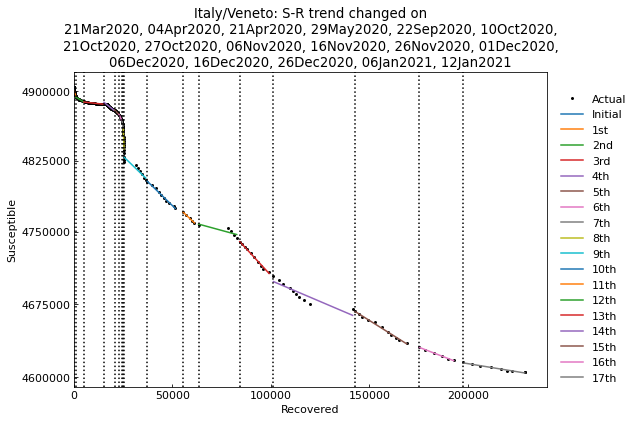

In [50]:
snl.trend(force=False)

In [51]:
# Enable 0th phase
snl.enable(phases=["0th"])
snl.summary()

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,03Mar2020,20Mar2020,4905037,SIR,10.94,0.167118,0.015274,1440.0,5.0,65.0,0.074389,1623.0,3 min 1 sec
1st,Past,21Mar2020,03Apr2020,4905037,SIR,5.19,0.078315,0.015083,1440.0,12.0,66.0,0.031760,1650.0,3 min 1 sec
2nd,Past,04Apr2020,20Apr2020,4905037,SIR,1.66,0.035672,0.021466,1440.0,28.0,46.0,0.062102,1656.0,3 min 1 sec
3rd,Past,21Apr2020,28May2020,4905037,-,-,-,-,-,-,-,-,-,-
4th,Past,29May2020,21Sep2020,4905037,-,-,-,-,-,-,-,-,-,-
5th,Past,22Sep2020,09Oct2020,4905037,SIR,1.85,0.059697,0.032301,1440.0,16.0,30.0,0.019326,2435.0,3 min 1 sec
6th,Past,10Oct2020,20Oct2020,4905037,SIR,4.01,0.075921,0.018925,1440.0,13.0,52.0,0.012092,121.0,0 min 10 sec
7th,Past,21Oct2020,26Oct2020,4905037,SIR,11.84,0.106375,0.008984,1440.0,9.0,111.0,0.008892,1646.0,3 min 1 sec
8th,Past,27Oct2020,05Nov2020,4905037,SIR,36.50,0.089395,0.002449,1440.0,11.0,408.0,0.019417,1666.0,3 min 1 sec
9th,Past,06Nov2020,15Nov2020,4905037,SIR,3.10,0.059770,0.019293,1440.0,16.0,51.0,0.040040,1687.0,3 min 1 sec


## Add phases one by one

In the previous sections, we started with S-R trend analysis. We can create phases without this analysis when you have a new idea to find change points.

In [74]:
# Clear all phases
snl.clear(include_past=True).summary()
snl.summary()

""


## Try using manual dates

In [75]:
# Set 0th phase to set the start date of 1st phase
snl.add(end_date="06Mar2020")
# Add 1st phase and disable 0th phase
snl.add(end_date="10Mar2020").disable(phases=["0th"])
# Add 2nd phase
snl.add(end_date="18May2020")
# Add 3rd phase
snl.add(end_date="03Nov2020")
# Add 4th phase
snl.add(end_date="22Dec2020")
# Add 5th phase
snl.add(end_date="10Jan2021")
# Add 6th phase to the last of the records
snl.add().summary()

,Type,Start,End,Population,tau
1st,Past,07Mar2020,10Mar2020,4905037,1440
2nd,Past,11Mar2020,18May2020,4905037,1440
3rd,Past,19May2020,03Nov2020,4905037,1440
4th,Past,04Nov2020,22Dec2020,4905037,1440
5th,Past,23Dec2020,10Jan2021,4905037,1440
6th,Past,11Jan2021,20Jan2021,4905037,1440


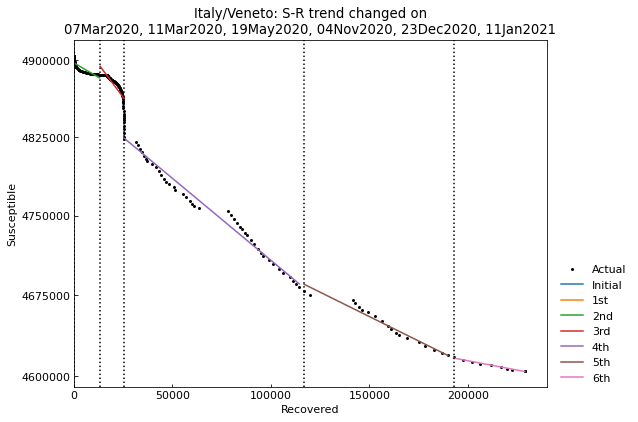

In [76]:
snl.trend(force=False)

In [77]:
snl.estimate(cs.SIR)


<SIR model: parameter estimation>
Running optimization with 4 CPUs...
	 1st phase (11Jan2021 - 20Jan2021): finished  179 trials in 0 min 10 sec
	 5th phase (23Dec2020 - 10Jan2021): finished  160 trials in 0 min 10 sec
	 2nd phase (07Mar2020 - 10Mar2020): finished 1915 trials in 3 min  1 sec
	 3rd phase (11Mar2020 - 18May2020): finished 1902 trials in 3 min  1 sec
	 6th phase (04Nov2020 - 22Dec2020): finished 1924 trials in 3 min  1 sec
	 4th phase (19May2020 - 03Nov2020): finished 2026 trials in 3 min  1 sec
Completed optimization. Total: 3 min 21 sec


In [78]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,rho,sigma,tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,07Mar2020,10Mar2020,4905037,SIR,10.74,0.167388,0.015591,1440,5,64,0.041911,1915,3 min 1 sec
2nd,Past,11Mar2020,18May2020,4905037,SIR,2.62,0.054517,0.020811,1440,18,48,0.807380,1902,3 min 1 sec
3rd,Past,19May2020,03Nov2020,4905037,SIR,0.93,0.020301,0.021921,1440,49,45,0.738920,2026,3 min 1 sec
4th,Past,04Nov2020,22Dec2020,4905037,SIR,2.16,0.049745,0.023043,1440,20,43,0.113540,1924,3 min 1 sec
5th,Past,23Dec2020,10Jan2021,4905037,SIR,0.86,0.034990,0.040745,1440,28,24,0.047485,160,0 min 10 sec
6th,Past,11Jan2021,20Jan2021,4905037,SIR,0.39,0.022230,0.057635,1440,44,17,0.008482,179,0 min 10 sec


For what stands **RMSLE** please refer to
https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

tl;dr ->instead of using the ROOT MEANS SQUARE ERROR it computes the logarithmic error, hence outliers become less important (good for real world data)